In [18]:
import xarray as xr
import pickle
import cmocean as cm
import matplotlib.pyplot as plt
import pickle
import netCDF4 as nc
import numpy as np
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')
import cmocean as cm
import glob
from salishsea_tools import viz_tools


%matplotlib inline

## goal: contemporary climatology of air-sea CO2 fluxes for patrick duke collaboration

daily air-sea co2 fluxes are only available for years 2013-2017 of a slightly older version of the SalishSeaCast flagship model. The carbonate chemistry module has not changed between model versions & I would expect differences between SalishSeaCast versions to be quite modest for the purposes of any co2 flux evaluation. 



In [6]:
sec_day = 60*60*24 #CONVERT FROM MMOL/M2/SEC TO MMOL/M2/DAY
#factor of 1.11 is asselin filter factor correction

tdir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls'
hindcast2013_co2_flx = pickle.load(open(f'{tdir}/hind_insitu_2013.pkl', 'rb'))  * sec_day * 1.11
hindcast2014_co2_flx = pickle.load(open(f'{tdir}/hind_insitu_2014.pkl', 'rb'))  * sec_day * 1.11
hindcast2015_co2_flx = pickle.load(open(f'{tdir}/hind_insitu_2015.pkl', 'rb'))  * sec_day * 1.11
hindcast2016_co2_flx = pickle.load(open(f'{tdir}/hind_insitu_2016.pkl', 'rb'))  * sec_day * 1.11
hindcast2017_co2_flx = pickle.load(open(f'{tdir}/hind_insitu_2017.pkl', 'rb'))  * sec_day * 1.11

## one day of co2 fluxes, as an example map:

Text(0.5, 1.0, '2017 average air-sea co2 flux (positive is ingassing)')

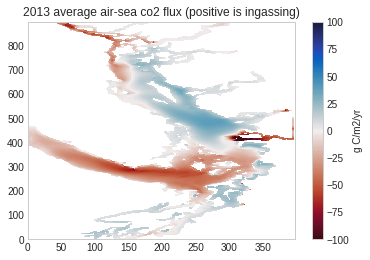

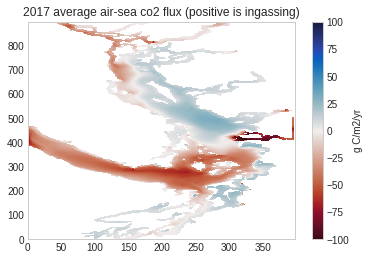

In [38]:

test_yr = np.sum(hindcast2013_co2_flx, axis = 0)*12.0107*1e-3 #mmol/m2/day g/m2/yr
test_yr[test_yr>1e6]=np.nan
test_yr[test_yr==0]=np.nan

plt.figure()
w = plt.pcolormesh(test_yr, vmin = -100, vmax = 100, cmap = cm.cm.balance_r)
plt.colorbar(w, label = 'g C/m2/yr')
plt.title('2013 average air-sea co2 flux (positive is ingassing)')


### 

test_yr = np.sum(hindcast2017_co2_flx, axis = 0)*12.0107*1e-3 #mmol/m2/day g/m2/yr
test_yr[test_yr>1e6]=np.nan
test_yr[test_yr==0]=np.nan


plt.figure()
w = plt.pcolormesh(test_yr, vmin = -100, vmax = 100, cmap = cm.cm.balance_r)
plt.colorbar(w, label = 'g C/m2/yr')
plt.title('2017 average air-sea co2 flux (positive is ingassing)')

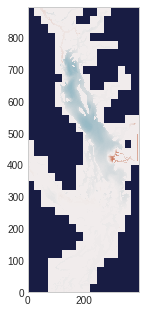

In [32]:
hindcast2013_co2_flx_1d = np.zeros(365)
hindcast2013_co2_flx[hindcast2013_co2_flx>1e10] = 0
hindcast2013_co2_flx[hindcast2013_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2013_co2_flx_1d[i] = np.nanmean(hindcast2013_co2_flx[i,:,:])

hindcast2014_co2_flx_1d = np.zeros(365)
hindcast2014_co2_flx[hindcast2014_co2_flx>1e10] = 0
hindcast2014_co2_flx[hindcast2014_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2014_co2_flx_1d[i] = np.nanmean(hindcast2014_co2_flx[i,:,:])

hindcast2015_co2_flx_1d = np.zeros(365)
hindcast2015_co2_flx[hindcast2015_co2_flx>1e10] = 0
hindcast2015_co2_flx[hindcast2015_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2015_co2_flx_1d[i] = np.nanmean(hindcast2015_co2_flx[i,:,:])

hindcast2016_co2_flx_1d = np.zeros(365)
hindcast2016_co2_flx[hindcast2016_co2_flx>1e10] = 0
hindcast2016_co2_flx[hindcast2016_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2016_co2_flx_1d[i] = np.nanmean(hindcast2016_co2_flx[i,:,:])

hindcast2017_co2_flx_1d = np.zeros(365)
hindcast2017_co2_flx[hindcast2017_co2_flx>1e10] = 0
hindcast2017_co2_flx[hindcast2017_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2017_co2_flx_1d[i] = np.nanmean(hindcast2017_co2_flx[i,:,:])

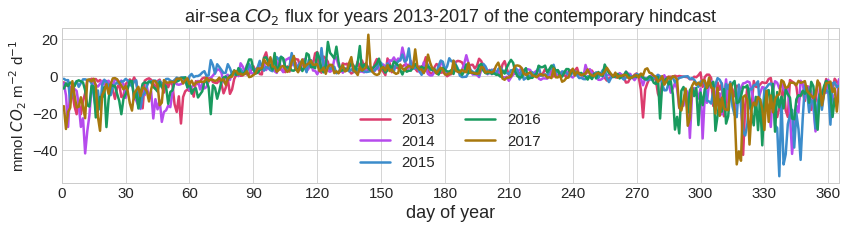

In [33]:
days = np.arange(1,366,1)
tcm = cm.cm.phase

fs = 18
fact = 0.7
fig = plt.figure(figsize=(17*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(2,1,1)

ax1.plot(days,hindcast2013_co2_flx_1d, \
         color = tcm(1.*1/5),linewidth = lw, linestyle = '-', label = '2013')
ax1.plot(days,hindcast2014_co2_flx_1d, \
         color = tcm(1.*2/5),linewidth = lw, linestyle = '-', label = '2014')
ax1.plot(days,hindcast2015_co2_flx_1d, \
         color = tcm(1.*3/5),linewidth = lw, linestyle = '-', label = '2015')
ax1.plot(days,hindcast2016_co2_flx_1d, \
         color = tcm(1.*4/5),linewidth = lw, linestyle = '-', label = '2016')
ax1.plot(days,hindcast2017_co2_flx_1d, \
         color = tcm(1.*5/5),linewidth = lw, linestyle = '-', label = '2017')

ax1.set_ylabel('mmol $CO_2$ m$^{-2}$ d$^{-1}$', fontsize = 15)
ax1.set_title('air-sea $CO_2$ flux for years 2013-2017 of the contemporary hindcast', fontsize = 18)
ax1.set_xlim(0,365)
w = ax1.set_xticks(np.arange(0, 365, step=30))

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(loc="best",ncol=2, fontsize = 15)
w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_xlim(0,365)
ax1.set_xlabel('day of year', fontsize = 18)
plt.tight_layout()

In [ ]:
hindcast2013_co2_flxb

In [36]:
t = xr.open_dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_202012_202012_dia2_T.nc')
t

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 1, x: 398, y: 898)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5000003 1.5000031 ... 441.4661
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2020-12-16T12:00:00
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    HetMRub               (time_counter, deptht, y, x) float32 ...
    MORTPHY               (time_counter, deptht, y, x) float32 ...
    MORTMRUB              (time_counter, deptht, y, x) float32 ...
    MORTDIAT              (time_counter, deptht, y, x) float32 ...
    GRMESZDIAT            (time_counter, deptht, y, x) float32 ...
    GRMESZMRUB            (time_counter, deptht, y, x) float32 ...
    GRMESZPHY             (time_counter, deptht, y, x) float32 ...
    GRMESZPON             (time_counter, deptht, y, x) float32 ...
    GRMESZMICZ            (time_counter, deptht, y, x) float32 ...
    GRMICZDIAT            (time_counter, deptht, y, x) float32 ...
    GRMICZMRUB            (time_counter, deptht, y, x) float32 ...
    GRMICZPHY             (time_counter, deptht, y, x) float32 ...
    GRMICZPON             (time_counter, deptht, y, x) float32 ...
    GRMICZMICZ            (time_counter, deptht, y, x) float32 ...
Attributes:
    name:                      SalishSea_1d_20201201_20201201_dia2_T
    description:               smelt diagnostics B
    title:                     smelt diagnostics B
    Conventions:               CF-1.6
    timeStamp:                 2020-Dec-01 20:59:42 GMT
    uuid:                      ef1034cb-0b10-4641-a8bc-80e9ce374f72
    history:                   Fri Feb 19 15:14:27 2021: ncra /results2/Salis...
    NCO:                       "4.5.4"
    nco_openmp_thread_number:  1